1) Delivery_time -> Predict delivery time using sorting time 

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
#Importing the data 
data=pd.read_csv(r"C:\Users\One\Desktop\Excelr\Assignments\4/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info() #Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.describe() #Statistical information about the data

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


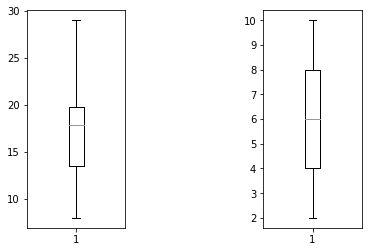

In [12]:
plt.subplot(1,3,1) # for checking the outliers in delivery time
plt.boxplot(data["Delivery Time"])
plt.subplot(1,3,3)
plt.boxplot(data["Sorting Time"])
plt.show()

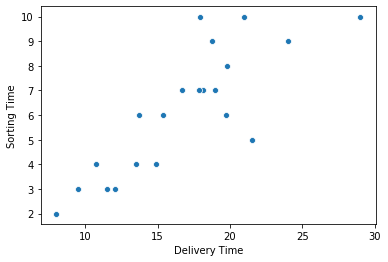

In [13]:
sns.scatterplot(data["Delivery Time"],data["Sorting Time"]) #Scatter plot for data Visualization
plt.show()

In [14]:
data.corr() #gives the corellation between the two variables

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [16]:
data.rename({"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime"},axis=1,inplace=True)
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Developing the model for prediction

In [17]:
model=smf.ols("DeliveryTime~SortingTime",data=data).fit() #Developing a model

In [18]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [19]:
model.rsquared

0.6822714748417231

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           3.98e-06
Time:                        22:34:40   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [29]:
newdata=pd.Series(data=[26])
newdata

0    26
dtype: int64

In [34]:
df=pd.DataFrame(newdata,columns=["SortingTime"])
df

,SortingTime
0,26


In [35]:
model.predict(df) #Predicting new data using the model

0    49.457251
dtype: float64